<a id="Title"></a>
# <span style="color:teal;font-weight:bold;">Spaceship Titanic 🩹 Data imputation</span>

This notebook is the third part of my <span style="font-weight:bold;color:green">Spaceship Titanic series</span>:

1. <a href="https://www.kaggle.com/code/fertmeneses/spaceship-titanic-getting-familiar">Spaceship Titanic 🏁 Getting familiar</a>.
2. <a href="https://www.kaggle.com/code/fertmeneses/spaceship-titanic-feature-engineering">Spaceship Titanic 💡 Feature engineering.</a>
3. <span style="font-weight:bold">Spaceship Titanic 🩹 Data imputation.</span> [This notebook]
4. Spaceship Titanic 🖥️ Model optimization. (Coming soon)
5. Spaceship Titanic 🔭 Integrated analysis. (Coming soon)

In the <span style="color:orangered;font-weight:bold;">first episode</span>, I studied the Leaderboard (LB) and tried simple Machine Learning models with the original dataset, getting a <span style="color:orangered;font-weight:bold;">submission score of 0.79635</span>. 

From that experience, I learned that **$\approx$75% of the submissions in the LB are below a 0.80 score, while only $\approx$5% are above 0.81**.

In the <span style="color:orange;font-weight:bold;">second episode</span>, I performed feature engineering on the original dataset (without any data correction), getting a <span style="color:orange;font-weight:bold;">submission score of 0.80336</span>.

<div style="color:white;
    display:fill;
    border-radius:15px;
    margin-left: 100px;
    margin-right: 100px;
    background-color:lightblue;
    font-size:105%;
    font-family:Verdana;
    letter-spacing:0.5px">

<p style="padding: 20px;color:black;text-align:center;">
In this <span style="color:green;font-weight:bold;">notebook</span>, I use my previously engineered features and focus on <span style="font-weight:bold;">data imputation</span> employing my own Machine Learning methods, getting a <span style="color:green;font-weight:bold;">submission score of X</span>.

</p>
</div>



In the future notebooks, I'll optimize the Machine Learning model and finally make an integrated analysis based on my results and a deep study of other kagglers' contributions.

<hr>

# <font color='teal'>Outline</font> <a class="anchor"  id="Outline"></a>

[**Load data and preprocess**](#Load_data_and_preprocess)

  - [Load original data](#Load_original_data)

  - [Basic feature engineering](#Basic_feature_engineering)

[**Manual data correction**](#Manual_data_correction)

  - [Expenses features](#Manual_data_correction_Expenses_Features)

  - [Cryosleep feature](#Manual_data_correction_Cryosleep_Feature)

  - [HomePlanet feature](#Manual_data_correction_HomePlanet_Feature)

[**ML data imputation**](#ML_data_imputation)

  - [Method description](#Method_description)

  - [Data selection](#Data_selection)

  - [Model tests](#Model_tests)

  - [Data imputation](#Data_imputation)

    - [Feature_X](#Data_imputation_Feature_X)
  
[**Feature engineering**](#Feature_engineering)

  - [Engineer features](#Engineer_features)
   
  - [Correlations](#Correlations)
   
  - [Combined features](#Feature_engineering_combined)
   
[**Submission results**](#Submission_results)

  - [Try models](#Try_models)
    
  - [Analyze results](#Analyze_results)
  
[**Conclusions**](#Conclusions)

<a id="Load_data_and_preprocess"></a>
# <span style="color:teal;font-weight:bold;">Load data and preprocess</span>

In this section, I load the original data and make basic feature engineering, in which I only extract information from single variables or change names. Other feature engineering processes that relate two or more features will come later.

In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2025-02-24 19:12:53.235239


<a id="Load_original_data"></a>
## <span style="color:teal;font-weight:bold;">Load original data</span>

In the following lines, I load the original datasets and get this information:

- Example for 10 random rows in training dataset.

- Number of rows in both datasets.

- Features' names and data types.

- Number of missing values in both datasets, per feature and per row.

In [2]:
import pandas as pd
import numpy as np
from termcolor import colored

# Load original datasets:
train_df = pd.read_csv('kaggle/input/spaceship-titanic/train.csv') # Training dataset
test_df = pd.read_csv('kaggle/input/spaceship-titanic/test.csv') # Testing dataset
# Keep the passengerID features separately:
train_ID = train_df['PassengerId']
test_ID = test_df['PassengerId']
# Display a 10 random examples:
np.random.seed(1) # Ensure reproducitibility
samples = np.random.choice(range(len(train_df)), 10, replace=False)
display(train_df.iloc[samples]) # Examples
# Print global information:
print('\nNumber of rows in train/test datasets:\n')
print(len(train_df),'/',len(test_df))
print('\nFeatures: names and data types:\n')
print(train_df.dtypes)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1454,1539_01,Europa,NaN,A/17/S,55 Cancri e,32.0,False,54.0,3782.0,0.0,21.0,5.0,Alyadum Barmant,True
218,0232_01,Earth,True,G/36/S,PSO J318.5-22,27.0,False,0.0,NaN,0.0,0.0,0.0,Nica Bakerrison,False
7866,8392_01,Earth,False,F/1610/S,PSO J318.5-22,24.0,False,86.0,669.0,1.0,0.0,0.0,Therly Brightez,False
7622,8141_01,Earth,True,G/1310/S,TRAPPIST-1e,38.0,False,0.0,0.0,0.0,0.0,0.0,Stenny Belley,True
4108,4387_01,Mars,False,F/902/P,PSO J318.5-22,32.0,False,192.0,0.0,441.0,18.0,0.0,Apix Wala,False
4363,4645_01,Europa,False,B/184/S,TRAPPIST-1e,48.0,False,0.0,9633.0,0.0,1.0,2.0,Aton Bacistion,True
343,0379_01,Earth,False,G/63/P,TRAPPIST-1e,31.0,False,198.0,0.0,591.0,0.0,164.0,Brita Moodson,True
5966,6324_01,Earth,False,E/420/S,NaN,31.0,False,19.0,509.0,0.0,0.0,177.0,Lesley Hinetthews,False
669,0699_01,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,True
6506,6865_01,Europa,False,D/208/S,TRAPPIST-1e,27.0,NaN,69.0,2878.0,0.0,4232.0,3798.0,Thabih Peducting,False



Number of rows in train/test datasets:

8693 / 4277

Features: names and data types:

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [3]:
def compute_missing_values(train_df,test_df):
    """
    Analyzes the missing values in each feature listed in the testing
    dataset, for both training and testing datasets.
    --- Inputs ---
    {train_df, test_df} [Dataframes]: Training and testing datasets.
    """
    print('\nMissing values in train/test datasets:\n')
    for col in test_df.columns:
        # Count missing values and obtain percentages:
        N_train = train_df[col].isna().sum() 
        N_test = test_df[col].isna().sum()
        p_train = N_train/len(train_df)*100 # [%]
        p_test = N_test/len(test_df)*100 # [%]
        # Print results:
        color_train = 'red' if N_train else 'green'
        color_test = 'red' if N_test else 'green'
        rmargin = 60-len(col)
        text_train = colored(f'{N_train} ({p_train:.1f}%)', color_train)
        text_test = colored(f'{N_test} ({p_test:.1f}%)', color_test)
        print(f'{col}:',f'{text_train} / {text_test}'.rjust(rmargin))
    # Count missing values in each row:
    N_nan_train = train_df.apply(lambda x: x.isna().sum(), axis=1)
    N_nan_test = test_df.apply(lambda x: x.isna().sum(), axis=1) 
    # Print number of rows with N missing values:
    print('')
    for n in set(N_nan_train).union(set(N_nan_test)):
        print(f'Number of rows with {n} missing values: {sum(N_nan_train==n)}/{sum(N_nan_test==n)}')

In [4]:
compute_missing_values(train_df,test_df)


Missing values in train/test datasets:

PassengerId:             0 (0.0%) / 0 (0.0%)
HomePlanet:           201 (2.3%) / 87 (2.0%)
CryoSleep:            217 (2.5%) / 93 (2.2%)
Cabin:               199 (2.3%) / 100 (2.3%)
Destination:          182 (2.1%) / 92 (2.2%)
Age:                  179 (2.1%) / 91 (2.1%)
VIP:                  203 (2.3%) / 93 (2.2%)
RoomService:          181 (2.1%) / 82 (1.9%)
FoodCourt:           183 (2.1%) / 106 (2.5%)
ShoppingMall:         208 (2.4%) / 98 (2.3%)
Spa:                 183 (2.1%) / 101 (2.4%)
VRDeck:               188 (2.2%) / 80 (1.9%)
Name:                 200 (2.3%) / 94 (2.2%)

Number of rows with 0 missing values: 6606/3281
Number of rows with 1 missing values: 1867/879
Number of rows with 2 missing values: 203/113
Number of rows with 3 missing values: 17/4


For more comments, please visit <a href="https://www.kaggle.com/code/fertmeneses/spaceship-titanic-feature-engineering">Spaceship Titanic 💡 Feature engineering.</a>

<a id="Basic_feature_engineering"></a>
## <span style="color:teal;font-weight:bold;">Basic feature engineering</span>

Except for the **PassengerID** feature, there are around 2% missing values in each feature of both training and testing datasets. In order to correct them, I'll make some fair assumptions and deductions using the original information. 

Then, **in this Basic feature engineering process I won't generate new features that involve two or more features, because that would multiply the missing values**. Instead, I will just extract information from the original features or make simple changes such as changing the feature name.

You can check my previous notebook <a href="https://www.kaggle.com/code/fertmeneses/spaceship-titanic-feature-engineering">Spaceship Titanic 💡 Feature engineering.</a> for details about the engineering of single features. In the following, I just apply that code.

In [25]:
# First generate the corrected datasets:
train_df_SF = train_df.copy()
test_df_SF = test_df.copy()

# # # "PassengerId": new features "IDgroup" and "GroupMembers" # # #

train_df_SF['IDgroup'] = train_df['PassengerId'].apply(
    lambda x: int(x.split('_')[0]))
test_df_SF['IDgroup'] = test_df['PassengerId'].apply(
    lambda x: int(x.split('_')[0]))
# Identify ocurrences for every unique value in IDgroup:
ocurrences = pd.concat([train_df_SF['IDgroup'], test_df_SF['IDgroup']]).value_counts().to_dict()
for dataset in [train_df_SF,test_df_SF]:
    dataset['GroupMembers'] = dataset['IDgroup'].apply(lambda x: ocurrences[x])
# Drop unnecessary feature:
train_df_SF = train_df_SF.drop('PassengerId',axis=1)
test_df_SF = test_df_SF.drop('PassengerId',axis=1)

# # # "CryoSleep": make boolean/numeric # # #

for dataset in [train_df_SF,test_df_SF]:
    dataset['CryoSleep'] = dataset['CryoSleep'].apply(
        lambda x: np.nan if x!=x else (1 if x else 0))

# # # "Cabin": new features "Cabin_Deck", "Cabin_num" and "Cabin_isPort" # # #

# Generate list of unique values:
cabin = list(train_df['Cabin'].loc[~train_df['Cabin'].isna()].values)+\
        list(test_df['Cabin'].loc[~test_df['Cabin'].isna()].values)
# Separate "Cabin" into three parts:
cabin_X = ['Cabin_Deck','Cabin_num','Cabin_Side']
for i,cabin in enumerate(cabin_X):
    train_df_SF[cabin] = train_df['Cabin'].apply(
        lambda x: np.nan if x!=x else (
            x.split('/')[i]))
    test_df_SF[cabin] = test_df['Cabin'].apply(
        lambda x: np.nan if x!=x else (
            x.split('/')[i]))
# Make 'Cabin_num' numeric:
for dataset in [train_df_SF,test_df_SF]:
    dataset['Cabin_num'] = pd.to_numeric(dataset['Cabin_num'], errors='coerce').astype(int)

# Change 'Cabin_Side' to 'Cabin_isPort' and make it boolean/numeric:
train_df_SF['Cabin_isPort'] = train_df_SF['Cabin_Side'].apply(
    lambda x: np.nan if x!=x else (1 if x=='P' else 0))
test_df_SF['Cabin_isPort'] = test_df_SF['Cabin_Side'].apply(
    lambda x: np.nan if x!=x else (1 if x=='P' else 0))
# Drop unnecesary features:
for feature in ['Cabin','Cabin_Side']:
    train_df_SF = train_df_SF.drop(feature,axis=1)
    test_df_SF = test_df_SF.drop(feature,axis=1)

# # # "Destination" redefinition # # #

train_df_SF["Destination"] = train_df["Destination"].apply(
    lambda x: np.nan if x!=x else (
    "Cancri" if x=="55 Cancri e" else (
        "PSO" if x=="PSO J318.5-22" else "Trappist"))
)
test_df_SF["Destination"] = test_df["Destination"].apply(
    lambda x: np.nan if x!=x else (
    "Cancri" if x=="55 Cancri e" else (
        "PSO" if x=="PSO J318.5-22" else "Trappist"))
)

# # # Expense-features redefinition # # #

for dataset in [train_df_SF, test_df_SF]:
    dataset.rename(columns={
        'RoomService': 'ExpRS',
        'FoodCourt': 'ExpFC',
        'ShoppingMall': 'ExpSM',
        'Spa': 'ExpSpa',
        'VRDeck': 'ExpVR'
        }, inplace=True)

# # # "Name" feature: new features "Name_Last" and "Ocurrence_LastName" # # #

# Training dataset:
train_df_SF['Name_Last'] = train_df['Name'].apply(
    lambda x: np.nan if x!=x else (
        x.split(' ')[-1]))
# Testing dataset:
test_df_SF['Name_Last'] = test_df['Name'].apply(
    lambda x: np.nan if x!=x else (
        x.split(' ')[-1]))
# Identify ocurrences for every unique value in Name_Last:
ocurrences = pd.concat([train_df_SF['Name_Last'], test_df_SF['Name_Last']]).value_counts().to_dict()
for dataset in [train_df_SF,test_df_SF]:
    dataset['Ocurrence_LastName'] = dataset['Name_Last'].apply(
        lambda x: np.nan if x!=x else ocurrences[x])
# Drop unnecessary feature:
train_df_SF = train_df_SF.drop('Name',axis=1)
test_df_SF = test_df_SF.drop('Name',axis=1)

In [26]:
train_df_SF['Cabin_num']

0          0.0
1          0.0
2          0.0
3          0.0
4          1.0
         ...  
8688      98.0
8689    1499.0
8690    1500.0
8691     608.0
8692     608.0
Name: Cabin_num, Length: 8693, dtype: float64

Below, I summarize all **features after the basic engineering process**:

| Feature | Definition |
| :---: | :--- |
| **IDgroup** | Indicates the group with which the passenger is travelling with. People in a group are often family members, but not always. |
| **GroupMembers** | Number of passengers sharing the same **IDgroup** (including self). |
| **Name_Last** | Last name of the passenger. |
| **Ocurrence_LastName** | Number of passengers sharing the same last name (including self). |
| **HomePlanet** | The planet the passenger departed from, typically their planet of permanent residence. |
| **CryoSleep** | Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins. |
| **Destination** | The planet the passenger will be debarking to. |
| **Age** | The age of the passenger. |
| **VIP** | Whether the passenger has paid for special VIP service during the voyage. |
| **Cabin_Deck** | Designation of the Deck in which the passenger's cabin is located |
| **Cabin_num** | Passenger's cabin number |
| **Cabin_isPort** | Side of the starship in which the passenger's cabin is located: a value 1 means Port, 0 means Starboard. |
| **ExpRS** | Amount the passenger has billed at the Room Service luxury amenity |
| **ExpFC** | Amount the passenger has billed at the Food Court luxury amenity |
| **ExpSM** | Amount the passenger has billed at the Shopping Mall luxury amenity |
| **ExpSpa** | Amount the passenger has billed at the Spa luxury amenity |
| **ExpVR** | Amount the passenger has billed at the VRDeck luxury amenity |

<a id="Manual_data_correction"></a>
# <span style="color:teal;font-weight:bold;">Manual data correction</span>

As the original features have changed their names and expanded into a new set, I compute again the missing values:

In [7]:
compute_missing_values(train_df_SF,test_df_SF)


Missing values in train/test datasets:

HomePlanet:           201 (2.3%) / 87 (2.0%)
CryoSleep:            217 (2.5%) / 93 (2.2%)
Destination:          182 (2.1%) / 92 (2.2%)
Age:                  179 (2.1%) / 91 (2.1%)
VIP:                  203 (2.3%) / 93 (2.2%)
ExpRS:                181 (2.1%) / 82 (1.9%)
ExpFC:               183 (2.1%) / 106 (2.5%)
ExpSM:                208 (2.4%) / 98 (2.3%)
ExpSpa:              183 (2.1%) / 101 (2.4%)
ExpVR:                188 (2.2%) / 80 (1.9%)
IDgroup:                 0 (0.0%) / 0 (0.0%)
GroupMembers:            0 (0.0%) / 0 (0.0%)
Cabin_Deck:          199 (2.3%) / 100 (2.3%)
Cabin_num:           199 (2.3%) / 100 (2.3%)
Cabin_isPort:        199 (2.3%) / 100 (2.3%)
Name_Last:            200 (2.3%) / 94 (2.2%)
Ocurrence_LastName:   200 (2.3%) / 94 (2.2%)

Number of rows with 0 missing values: 6606/3281
Number of rows with 1 missing values: 1551/723
Number of rows with 2 missing values: 289/152
Number of rows with 3 missing values: 202/101
Number

Again, about 2% of the values are missing in each feature, and now that the features have been divided into multiple subfeatures (such as **Cabin** into **Cabin_Deck**, **Cabin_num** and **Cabin_isPort**), now some rows have up to 5 or 6 missing values.

In the following, I analyze the single features and complete those missing values that can be deducted by reasonable assumptions.

In [8]:
# Define plotting functions:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_swarm(df,feat,axis,ref_feat='Transported',
               xlabels_off=False,seed=42):
    """
    Plots a swarm plot ordered by the transported rate from a 
    single feature within the dataset.
    --- Inputs ---
    {df} [Dataframe]: Dataset, must include the columns with 
    names {feat} and {ref_feat}.
    {feat} [String]: Name of the column (feature) to be analyzed.
    {ref_feat} [String]: Name of the column (feature) by which {feat} will
    be analyzed. This feature must be binary with values 0 and 1.
    {axis} [matplotlib axis object]: Axis for the current subplot.
    {xlabels_off} [Boolean]: If True, remove the x-labels.
    {seed} [Integer]: Seed for random scattering in swarm plots.
    """
    # Identify data, count frequency per variable and sort it alphabetically:
    data = df[feat] # Training dataset    
    data_counts = data.value_counts().sort_index()
    # For each variable, identify the transported rate and build the swarm plot:
    np.random.seed(seed) # Random seed for swarm plots
    for i, var in enumerate(data_counts.keys()):
        # Determine points' location:
        ref_rate = df.groupby([feat]).mean(numeric_only=True)[ref_feat].loc[var] # Reference rate
        pp_pos = int(len(df[(df[feat]==var)])*ref_rate) # Positive reference values
        pp_neg = int(len(df[(df[feat]==var)])*(1-ref_rate)) # Negative reference values
        var_pos = np.random.uniform(0, ref_rate,pp_pos) # Randomly assign locations for "positive" points
        var_neg = np.random.uniform(ref_rate,1,pp_neg) # Randomly assign locations for "negative" points              
        # Allocate all points in plot:
        color = np.array(sns.color_palette('tab20')[i])
        axis.scatter(i+np.random.uniform(-0.3, 0.3, len(var_neg)), var_neg,s=10,
                     color=color, edgecolor=np.append(color,0.2),
                     alpha=0.1, label=f'{var}({ref_feat}=0)')
        axis.scatter(i+np.random.uniform(-0.3, 0.3, len(var_pos)), var_pos,s=10,
                     color=color, edgecolor=np.append(color,0.2),
                     label=f'{var}({ref_feat}=1)')
        axis.plot([i-0.3,i+0.3],[ref_rate,ref_rate],ls='--',color='k',lw=1)
    # Ticks and limits:
    axis.set_xlim(-0.5, len(data_counts)-0.5)
    axis.set_ylim(-0.03, 1.1)
    if xlabels_off:
        axis.set_xticks([])
        axis.set_xticklabels([])
    else:
        axis.set_xticks(np.linspace(0,len(data_counts.keys())-1,len(data_counts.keys())))
        axis.set_xticklabels(data_counts.keys(), fontsize=10)
    axis.set_yticks([], minor=False)
    axis.set_ylabel('')
    # Spines, legend and title:
    for s in ["top","right","left", 'bottom']:
        axis.spines[s].set_visible(False)
    axis.legend([0,1],title=ref_feat,loc=(0.8, 0.7), edgecolor='k')
    axis.set_title(f'Feature bars: {feat}; feature points: {ref_feat}')

import warnings # <sns.kdeplot> gives a warning I couldn't fix, I avoid displaying it...
warnings.simplefilter(action='ignore', category=FutureWarning)

def plot_KDE(df,feat,axis,ref_feat):
    """
    Plots a kernel density estimate (KDE) plot ordered by the 
    reference rate from a single feature within the dataset.
    --- Inputs ---
    {df} [Dataframe]: Training dataset, must include the columns with
    names {feat} and {ref_feat}.
    {feat} [String]: Name of the column (feature) to be analyzed.
    {ref_feat} [String]: Name of the column (feature) by which {feat} will
    be analyzed. This feature must be binary with values 0 and 1.
    {axis} [matplotlib axis object]: Axis for the current subplot.
    """    
    # Plot KDE:
    sns.kdeplot(x=feat, data=df, ax=axis, fill=True,cut=0,
                bw_method=0.15, lw=1.4, edgecolor='lightgray', hue=ref_feat,
                multiple="stack", palette='PuBu', alpha=0.8)
    axis.set_yticks([], minor=False)
    axis.set_ylabel('Density')
    axis.set_title(f'{feat}: "{ref_feat}" rate')
    for s in ["top","right","left", 'bottom']: # Remove spins
        axis.spines[s].set_visible(False)  

def single_feat_corr(df,feat_targ,feat_rel):
    """
    Plots the KDE distribution of values for a target feature within
    a single dataset, grouped by a relative feature.
    --- Inputs ---
    {df} [Dataframe]: Dataset that will be analyzed, must include the
    target {feat_targ} and relative {feat_rel} features.
    {feat_targ} [String]: Target feature.
    {feat_rel} [String]: Relative feature.
    """
    # First clean the dataset from the NaN values in the {feat_rel} feature:
    df_copy = df[[feat_targ,feat_rel]].copy()
    df_copy = df_copy.dropna()
    print("Number of known values:", df_copy[feat_targ].notna().sum())
    fig, ax = plt.subplots(figsize=(8,3)) # Start figure
    if df[feat_targ].dtype == 'object': # Non-numerical features:
        plot_swarm(df_copy,feat_targ,ax,ref_feat=feat_rel)    
    else: # Numerical features:
        plot_KDE(df_copy,feat_targ,ax,ref_feat=feat_rel)
    fig.tight_layout()

def make_two_feature_chart(df,feat1,feat2,figsize=(10,4)):
    """
    Make a double entry chart, relating two features in the dataset.
    --- Inputs ---
    {df} [Dataframe]: Dataset that will be analyzed, must include the
    {feat1} [String]: Name of one the features to be compared.
    {feat2} [String]: Name of the other feature to be compared.
    {figsize} [Tuple]: Define the size for the figure, in the format (width,length).
    """
    # Group one feature according to the other:
    CDHP_gb = all_df.groupby([feat1,feat2])[feat2].size().unstack().fillna(0)
    # Plot distribution:
    plt.figure(figsize=figsize)
    sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm')
    plt.show()

<a id="Manual_data_correction_Expenses_Features"></a>
## <span style="color:teal;font-weight:bold;">Expenses features</span>

The expenses features **ExpRS**, **ExpFC**, **ExpSM**, **ExpSpa** and **ExpVR** can be combined in a total expenditure feature, namely **ExpTotal**, which will be helpful to make correlations with the other features. In addition, I will define a boolean feature **Exp_zero**, which takes the value True for those passengers who spent nothing during the trip, else False.

In [9]:
# Expense features:
exp_features = ['ExpRS','ExpFC','ExpSM','ExpSpa','ExpVR']
# Build ExpTotal and Exp_zero for each dataset:
for dataset in [train_df_SF, test_df_SF]:
    # Identify all rows in which the expenses information is complete:
    idx = ((~dataset['ExpRS'].isna()) & 
           (~dataset['ExpFC'].isna()) & 
           (~dataset['ExpSM'].isna()) & 
           (~dataset['ExpSpa'].isna()) & 
           (~dataset['ExpVR'].isna())) # Relevant indexes
    # Initiate ExpTotal as NaN, then complete valid values:
    pd.options.mode.chained_assignment = None  # default='warn'
    dataset['ExpTotal'] = np.nan
    dataset['ExpTotal'][idx] = dataset[exp_features].sum(axis="columns")[idx]
    # Create 'Exp_zero' feature, that checks whether a passenger spent nothing (True) or something (False):
    dataset['Exp_zero'] = np.nan # Initiate with NaN values
    dataset.loc[dataset['ExpTotal']==0,'Exp_zero'] = True # Compute True values
    dataset.loc[dataset['ExpTotal']>0,'Exp_zero'] = False # Compute False values

After exploring the correlation between **ExpTotal** and other features, I observed a clear correlation with the **Age** feature: passengers who are 12 or younger do not expend! The following plot demonstrates this pattern:

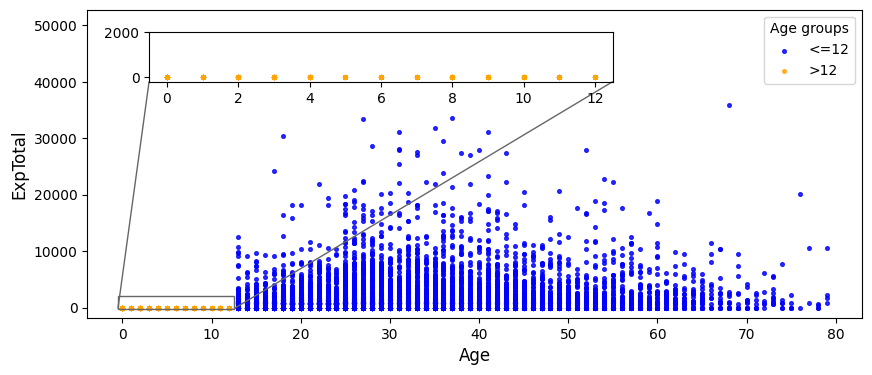

In [10]:
# Merge training and testing datasets:
all_df = pd.concat([train_df_SF, test_df_SF])
# Set age condition:
age_limit = 12 # Set age limit for zoomed-in plot
cond_age = all_df["Age"] <= age_limit

# Plot expenses vs age:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(all_df["Age"][~cond_age],all_df["ExpTotal"][~cond_age],s=7,alpha=0.8,color='blue',label='<=12')
ax.scatter(all_df["Age"][cond_age],all_df["ExpTotal"][cond_age],s=7,alpha=0.8,color='orange',label='>12')
ax.set_xlabel('Age',fontsize=12), ax.set_ylabel('ExpTotal',fontsize=12)
ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]+15000)
ax.legend(title='Age groups')
# Zoomed-in image:
axins = zoomed_inset_axes(ax, 4, loc=6, bbox_to_anchor=[180,280,50,50])
axins.scatter(all_df["Age"][cond_age],all_df["ExpTotal"][cond_age],s=7,alpha=0.8,color='orange')
axins.set_xlim(-0.5, age_limit+0.5), axins.set_ylim(-200, 2000)
mark_inset(ax, axins, loc1=4, loc2=3, fc="none", ec="0.4") # Lines for inset image
plt.show()

Consequently, for passengers with feature **Age**<12, I will fill all expenses missing values as zero.

In [11]:
age_limit = 12 # Set age limit for zoomed-in plot
for dataset in [train_df_SF, test_df_SF]:
    idx = dataset["Age"][dataset["Age"] <= age_limit].index # Relevant indexes
    for feat in exp_features:
        dataset[feat].loc[idx] = 0 # Assign zero expenses

After this process, **131 missing values were corrected**.

(Remember you can call the function "compute_missing_values" at any step to see the number of missing values)

Now, let's turn the attention to the CryoSleeping passengers, who most probably could not spend anything during the trip:

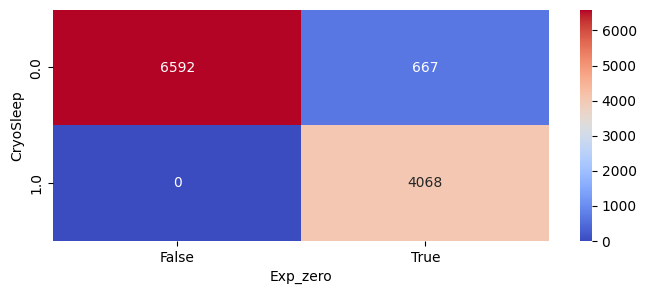

In [12]:
make_two_feature_chart(pd.concat([train_df_SF, test_df_SF]),'Exp_zero','CryoSleep',figsize=(8,3))

As expected, all those passengers who were cryo-sleeping (**CryoSleep**=1) spent nothing (**Exp_zero**=True) during the trip. Then, let's assign zero expenses to all those missing expenses values from sleeping passengers: 

In [13]:
for dataset in [train_df_SF, test_df_SF]:
    idx = dataset["CryoSleep"][dataset["CryoSleep"] == True].index # Relevant indexes
    for feat in exp_features:
        dataset[feat].loc[idx] = 0 # Assign zero expenses

This time, **467 missing values were corrected**!

And I have to stop here, as there no other certain rules for the other features. The **VIP** feature sounds like a good candidate for spending patterns, expecting that the wealthy passengers have some expenses. However, although most VIP people spent something, there are some exceptions, then I cannot make any assumptions:

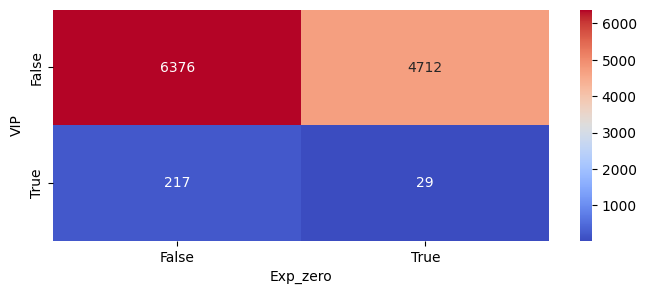

In [14]:
make_two_feature_chart(pd.concat([train_df_SF, test_df_SF]),'Exp_zero','VIP',figsize=(8,3))

<a id="Manual_data_correction_Cryosleep_Feature"></a>
## <span style="color:teal;font-weight:bold;">Cryosleep Feature</span>

As I demonstrated before, passengets who went to cryosleeping spent nothing during the trip.

Before, I corrected the missing expenses values by assigning zero expenses to all sleeping passengers. Now I'll do the converse operation: for any missing **CryoSleep** value, if the passenger spent something (**Exp_zero**=False), then that passenger was not cryosleeping, then **CryoSleep**=False.

In [15]:
for dataset in [train_df_SF, test_df_SF]:
    # Correct missing values:
    idx = (dataset['CryoSleep'].isna()) & (dataset['Exp_zero']==False) # Relevant indexes
    dataset['CryoSleep'].loc[idx] = 0

*Note*: in this process, the new feature **ExpTotal** sums all individual expenditures, including the NaN values! The NaN values are counted as 0. Although I did not analyze any of the expense features yet, I will tolerate this assumption for the **CryoSleep** analysis.

Let me summarize the progress so far for the **CryoSleep** feature: 
* Initial missing values: <span style="color:red">217 (2.5%) / 93 (2.2%)</span>.
* Current missing values: <span style="color:red">111 (1.3%) / 42 (1.0%)</span>.

<a id="Manual_data_correction_HomePlanet_Feature"></a>
## <span style="color:teal;font-weight:bold;">HomePlanet feature</span>

Passengers are organized in groups, identified by **IDgroup**. These groups have a common Home planet, as the next lines of code demonstrate:

In [16]:
for i in set(all_df['IDgroup']):
    # Make a set with all Home planets for the current group (exclude NaN):
    homes = set([x for x in all_df[all_df['IDgroup']==i]['HomePlanet'] if x==x])
    # If there is more than a single home planet in the group, print on screen:
    if len(homes)>1:
        print(i,all_df[all_df['IDgroup']==i]['HomePlanet'])

Consequently, any missing values in **HomePlanet** can be filled with the known destination of another passenger with the same **IDgroup**.

In [17]:
for dataset in [train_df_SF, test_df_SF]:
    idx = dataset.loc[pd.isna(dataset["HomePlanet"]), :].index # Relevant indexes
    for i in idx:
        homes = list(set([x for x in all_df[all_df['IDgroup']==dataset['IDgroup'][i]]['HomePlanet'] if x==x]))
        if len(homes)>0:
            dataset["HomePlanet"].loc[i] = homes[0]

As there are still missing values in **HomePlanet**, I turn my attention to the correlation with the **Cabin_Deck** feature, as they are highly correlated (see section Correlations II in <a href="https://www.kaggle.com/code/fertmeneses/spaceship-titanic-feature-engineering">Spaceship Titanic 💡 Feature engineering.</a>).

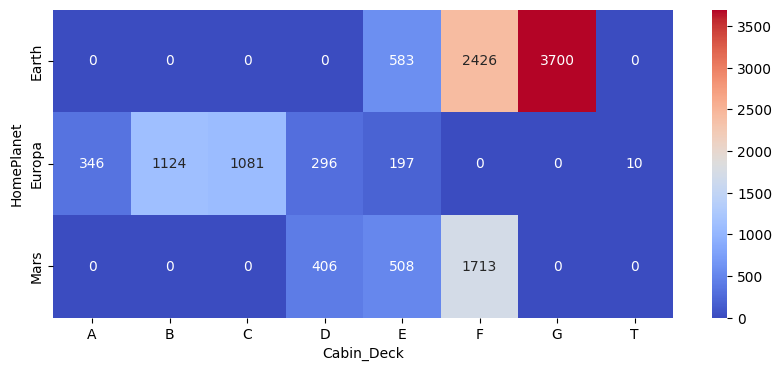

In [18]:
make_two_feature_chart(pd.concat([train_df_SF, test_df_SF]),'Cabin_Deck','HomePlanet',figsize=(10,4))

From this distribution plot, I can conclude the following:
- Passengers in **Cabin_Deck** A,B,C,T are associated with the **HomePlanet** Europa.
- Passengers in **Cabin_Deck** G are associated with the **HomePlanet** Earth.
- Passengers in **Cabin_Deck** D,E,F cannot be clearly assigned to a **HomePlanet**.

In [19]:
# Assign HomePlanet values based on Cabin:
for dataset in [train_df_SF, test_df_SF]:
    # Cabins A,B,C,T, associated to Europa:
    cond_ABCT = ((dataset["Cabin_Deck"]=="A") |
                 (dataset["Cabin_Deck"]=="B") |
                 (dataset["Cabin_Deck"]=="C") |
                 (dataset["Cabin_Deck"]=="T")) # Define condition
    dataset["HomePlanet"].loc[cond_ABCT] = "Europa" # Apply changes
    # Cabins G, associated to Earth:
    cond_G = dataset["Cabin_Deck"]=="G" # Define condition
    dataset["HomePlanet"].loc[cond_G] = "Earth" # Apply changes

Let's summarize the progress so far for the **HomePlanet** feature: 
* Initial missing values: <span style="color:red">201 (2.3%) / 87 (2.0%)</span>.
* Current missing values: <span style="color:red">63 (0.7%) / 31 (0.7%)</span>.

I have one last resource! Before, I grouped the passengers according to their **IDgroup** and correlated their **HomePlanet**. I will do the same with the **Name_Last** feature, and show that all passengers sharing the same surname belong to the same **HomePlanet**:

In [20]:
all_df = pd.concat([train_df_SF, test_df_SF])
for surname in set(all_df["Name_Last"]):
    # Make a set with all Home planets for the current group (exclude NaN):
    homes = set([x for x in all_df[all_df['Name_Last']==surname]['HomePlanet'] if x==x])
    # If there is more than a single home planet in the group, print on screen:
    if len(homes)>1:
        print(surname,all_df[all_df['Name_Last']==surname]['HomePlanet'])

Consequently, any missing values in **HomePlanet** can be filled with the known destination of another passenger with the same **Name_Last**.

In [21]:
for dataset in [train_df_SF, test_df_SF]:
    idx = dataset.loc[pd.isna(dataset["HomePlanet"]), :].index # Relevant indexes
    for i in idx:
        homes = list(set([x for x in all_df[all_df['Name_Last']==dataset['Name_Last'][i]]['HomePlanet'] if x==x]))
        if len(homes)>0:
            dataset["HomePlanet"].loc[i] = homes[0]

Excellent news, now the **HomePlanet** feature presents only a few missing values! 
* Current missing values: <span style="color:red">5 (0.1%) / 5 (0.1%)</span>.

In [22]:
train_df_SF.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'ExpRS',
       'ExpFC', 'ExpSM', 'ExpSpa', 'ExpVR', 'Transported', 'IDgroup',
       'GroupMembers', 'Cabin_Deck', 'Cabin_num', 'Cabin_isPort', 'Name_Last',
       'Ocurrence_LastName', 'ExpTotal', 'Exp_zero'],
      dtype='object')

In [23]:
all_df['Cabin_num']

0          0.0
1          0.0
2          0.0
3          0.0
4          1.0
         ...  
4272    1496.0
4273       NaN
4274     296.0
4275     297.0
4276    1498.0
Name: Cabin_num, Length: 12970, dtype: float64

TypeError: 'value' must be an instance of str or bytes, not a float

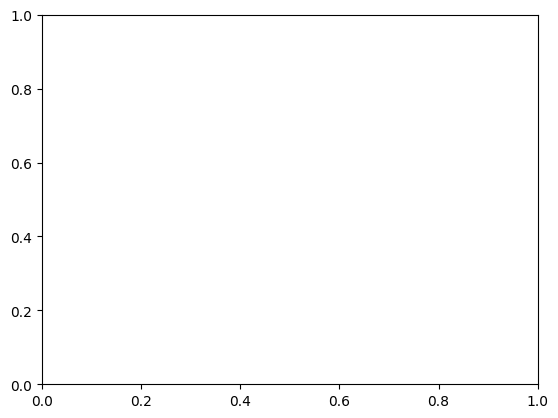

In [24]:
# all_df = pd.concat([train_df_SF, test_df_SF])
# a = pd.to_numeric(all_df['Cabin_num'], errors='coerce')
plt.plot(all_df['Destination'],all_df['Cabin_num'])

In [ ]:
make_two_feature_chart(pd.concat([train_df_SF, test_df_SF]),'Destination','Exp_zero',figsize=(10,4))

<a id="ML_data_imputation"></a>
# <span style="color:teal;font-weight:bold;">ML data imputation</span>

Xxxx

<a id="Feature_engineering"></a>
# <span style="color:teal;font-weight:bold;">Feature engineering</span>

Xxxx

<a id="Submission_results"></a>
# <span style="color:teal;font-weight:bold;">Submission results</span>

Xxxx

<a id="Conclusions"></a>
# <span style="color:teal;font-weight:bold;">Conclusions</span>

Xxxx